In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

fn = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        fn.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

fn

/kaggle/input/news-articles/Articles.csv


['/kaggle/input/news-articles/Articles.csv']

In [2]:
df = pd.read_csv(fn[0], encoding='iso-8859-1')
df

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business
...,...,...,...,...
2687,strong>DUBAI: Dubai International Airport and ...,3/25/2017,Laptop ban hits Dubai for 11m weekend traveller,business
2688,"strong>BEIJING: Former Prime Minister, Shaukat...",3/26/2017,Pak China relations not against any third coun...,business
2689,strong>WASHINGTON: Uber has grounded its fleet...,3/26/2017,Uber grounds self driving cars after accid,business
2690,strong>BEIJING: The New Development Bank plans...,3/27/2017,New Development Bank plans joint investments i...,business


In [3]:
df.iloc[0]['Article']

'KARACHI: The Sindh government has decided to bring down public transport fares by 7 per cent due to massive reduction in petroleum product prices by the federal government, Geo News reported.Sources said reduction in fares will be applicable on public transport, rickshaw, taxi and other means of traveling.Meanwhile, Karachi Transport Ittehad (KTI) has refused to abide by the government decision.KTI President Irshad Bukhari said the commuters are charged the lowest fares in Karachi as compare to other parts of the country, adding that 80pc vehicles run on Compressed Natural Gas (CNG). Bukhari said Karachi transporters will cut fares when decrease in CNG prices will be made.                        \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n'

In [4]:
from transformers import pipeline

pipe = pipeline('text2text-generation', model="cardiffnlp/flan-t5-small-tweet-topic")
output = pipe("The @Clinton_LumberKings beat the @Cedar_Rapids_Kernels 4-0 in Game 1 of the Western Division finals. Evan Edwards hit a 2-run HR. WP Josh Roberson: 5 IP, 3 H, 0 R, 0 BB, 10 K #MWLplayoffs #MWLscoreboard")

config.json:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [5]:
output

[{'generated_text': 'sports'}]

In [6]:
df.columns

Index(['Article', 'Date', 'Heading', 'NewsType'], dtype='object')

In [7]:
from tqdm import tqdm
tqdm.pandas()  # Initialize tqdm with pandas

In [8]:
# Function to generate topic
def generate_topic(text):
    result = pipe(text)
    return result[0]['generated_text']

# Apply the function to 'Article' and 'Heading' columns
df['ArticleTopic'] = df['Article'].progress_apply(generate_topic)
df['HeadingTopic'] = df['Heading'].progress_apply(generate_topic)

df

  0%|          | 0/2692 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
  0%|          | 0/2692 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
100%|██████████| 2692/2692 [05:30<00:00,  8.16it/s]


,Article,Date,Heading,NewsType,ArticleTopic,HeadingTopic
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business,,tv news
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business,"Hong Kong shares rose 1.07 percent, closing 25...",asia stocks up in new year
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business,Hong Kong shares open 0.66 percent lower,hong kong stocks opened 0.66 percent lower
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business,Asian markets tumbled Tuesday following painfu...,asian stocks sink euro
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business,US oil prices slipped below $50 a barrel for t...,oil prices slip below 50 a.m.
...,...,...,...,...,...,...
2687,strong>DUBAI: Dubai International Airport and ...,3/25/2017,Laptop ban hits Dubai for 11m weekend traveller,business,"Emirates, Dubai, UAE, Qatar, Saudi Arabia, Qat...",sports
2688,"strong>BEIJING: Former Prime Minister, Shaukat...",3/26/2017,Pak China relations not against any third coun...,business,news_&_social_concern,
2689,strong>WASHINGTON: Uber has grounded its fleet...,3/26/2017,Uber grounds self driving cars after accid,business,auto-pilot,Uber drivers were urged to drive their cars
2690,strong>BEIJING: The New Development Bank plans...,3/27/2017,New Development Bank plans joint investments i...,business,business,Business


In [9]:
df

,Article,Date,Heading,NewsType,ArticleTopic,HeadingTopic
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business,,tv news
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business,"Hong Kong shares rose 1.07 percent, closing 25...",asia stocks up in new year
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business,Hong Kong shares open 0.66 percent lower,hong kong stocks opened 0.66 percent lower
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business,Asian markets tumbled Tuesday following painfu...,asian stocks sink euro
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business,US oil prices slipped below $50 a barrel for t...,oil prices slip below 50 a.m.
...,...,...,...,...,...,...
2687,strong>DUBAI: Dubai International Airport and ...,3/25/2017,Laptop ban hits Dubai for 11m weekend traveller,business,"Emirates, Dubai, UAE, Qatar, Saudi Arabia, Qat...",sports
2688,"strong>BEIJING: Former Prime Minister, Shaukat...",3/26/2017,Pak China relations not against any third coun...,business,news_&_social_concern,
2689,strong>WASHINGTON: Uber has grounded its fleet...,3/26/2017,Uber grounds self driving cars after accid,business,auto-pilot,Uber drivers were urged to drive their cars
2690,strong>BEIJING: The New Development Bank plans...,3/27/2017,New Development Bank plans joint investments i...,business,business,Business


In [10]:
df.columns

Index(['Article', 'Date', 'Heading', 'NewsType', 'ArticleTopic',
       'HeadingTopic'],
      dtype='object')

In [11]:
pip install sentence_transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm
import logging

# Suppress the internal progress bars by setting the logging level
logging.getLogger('sentence_transformers').setLevel(logging.WARNING)

# Initialize the SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to calculate similarity
def calculate_similarity(text1, text2):
    embeddings1 = model.encode(text1, convert_to_tensor=True)
    embeddings2 = model.encode(text2, convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(embeddings1, embeddings2)
    return similarity.item()

# Apply the function to 'Article' and 'ArticleTopic' columns with a single tqdm progress bar
with tqdm(total=len(df), desc="Calculating Scores") as pbar:
    def apply_and_update(row):
        row['ArticleScore'] = calculate_similarity(row['Article'], row['ArticleTopic'])
        row['HeadingScore'] = calculate_similarity(row['Heading'], row['HeadingTopic'])
        pbar.update(1)
        return row

    df = df.apply(apply_and_update, axis=1)

df.to_csv('updated_file.csv', index=False)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Calculating Scores: 100%|██████████| 2692/2692 [04:38<00:00,  9.67it/s]


In [13]:
df

,Article,Date,Heading,NewsType,ArticleTopic,HeadingTopic,ArticleScore,HeadingScore
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business,,tv news,0.060275,0.052196
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business,"Hong Kong shares rose 1.07 percent, closing 25...",asia stocks up in new year,0.680050,0.934883
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business,Hong Kong shares open 0.66 percent lower,hong kong stocks opened 0.66 percent lower,0.883311,0.978911
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business,Asian markets tumbled Tuesday following painfu...,asian stocks sink euro,0.657567,0.935080
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business,US oil prices slipped below $50 a barrel for t...,oil prices slip below 50 a.m.,0.738630,0.854613
...,...,...,...,...,...,...,...,...
2687,strong>DUBAI: Dubai International Airport and ...,3/25/2017,Laptop ban hits Dubai for 11m weekend traveller,business,"Emirates, Dubai, UAE, Qatar, Saudi Arabia, Qat...",sports,0.500231,-0.029578
2688,"strong>BEIJING: Former Prime Minister, Shaukat...",3/26/2017,Pak China relations not against any third coun...,business,news_&_social_concern,,0.174678,0.011733
2689,strong>WASHINGTON: Uber has grounded its fleet...,3/26/2017,Uber grounds self driving cars after accid,business,auto-pilot,Uber drivers were urged to drive their cars,0.198619,0.520438
2690,strong>BEIJING: The New Development Bank plans...,3/27/2017,New Development Bank plans joint investments i...,business,business,Business,0.148338,0.192638


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


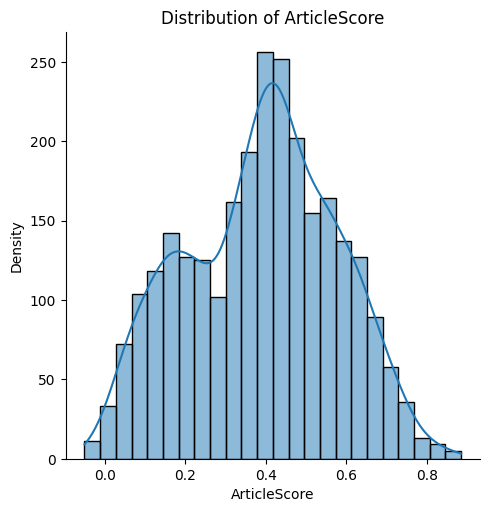

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


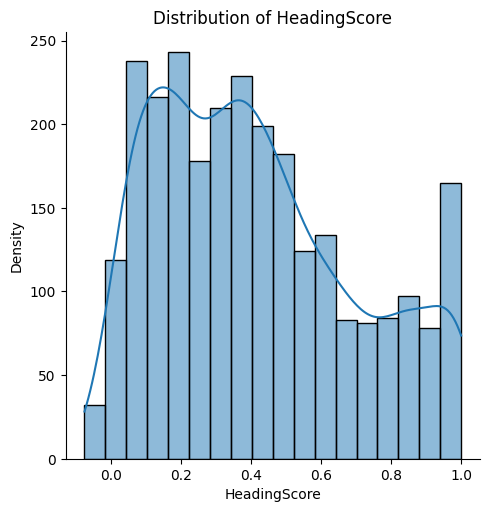

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.displot(df['ArticleScore'], kde=True)
plt.title('Distribution of ArticleScore')
plt.xlabel('ArticleScore')
plt.ylabel('Density')
plt.show()

sns.displot(df['HeadingScore'], kde=True)
plt.title('Distribution of HeadingScore')
plt.xlabel('HeadingScore')
plt.ylabel('Density')
plt.show()


In [15]:
df = df.drop_duplicates(subset=['Heading', 'HeadingTopic'])
df = df.drop_duplicates(subset=['Article', 'ArticleTopic'])
df

,Article,Date,Heading,NewsType,ArticleTopic,HeadingTopic,ArticleScore,HeadingScore
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business,,tv news,0.060275,0.052196
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business,"Hong Kong shares rose 1.07 percent, closing 25...",asia stocks up in new year,0.680050,0.934883
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business,Hong Kong shares open 0.66 percent lower,hong kong stocks opened 0.66 percent lower,0.883311,0.978911
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business,Asian markets tumbled Tuesday following painfu...,asian stocks sink euro,0.657567,0.935080
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business,US oil prices slipped below $50 a barrel for t...,oil prices slip below 50 a.m.,0.738630,0.854613
...,...,...,...,...,...,...,...,...
2669,strong>DUBAI: Dubai International Airport and ...,3/25/2017,Laptop ban hits Dubai for 11m weekend traveller,business,"Emirates, Dubai, UAE, Qatar, Saudi Arabia, Qat...",sports,0.500231,-0.029578
2670,"strong>BEIJING: Former Prime Minister, Shaukat...",3/26/2017,Pak China relations not against any third coun...,business,news_&_social_concern,,0.174678,0.011733
2671,strong>WASHINGTON: Uber has grounded its fleet...,3/26/2017,Uber grounds self driving cars after accid,business,auto-pilot,Uber drivers were urged to drive their cars,0.198619,0.520438
2690,strong>BEIJING: The New Development Bank plans...,3/27/2017,New Development Bank plans joint investments i...,business,business,Business,0.148338,0.192638


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


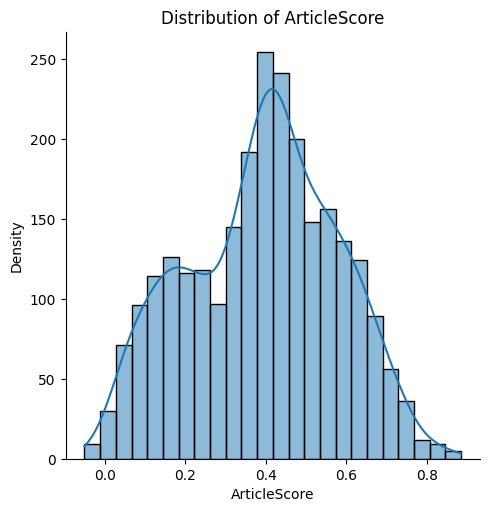

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


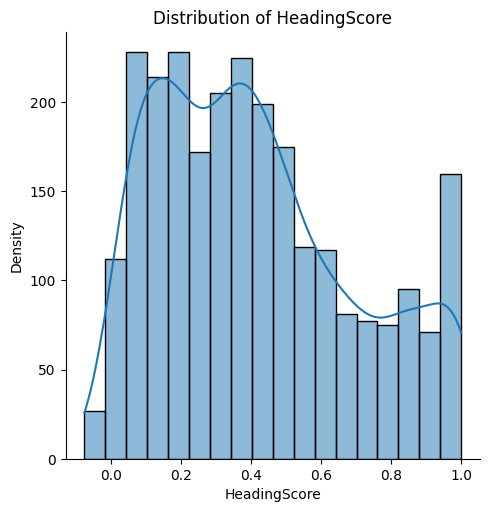

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.displot(df['ArticleScore'], kde=True)
plt.title('Distribution of ArticleScore')
plt.xlabel('ArticleScore')
plt.ylabel('Density')
plt.show()

sns.displot(df['HeadingScore'], kde=True)
plt.title('Distribution of HeadingScore')
plt.xlabel('HeadingScore')
plt.ylabel('Density')
plt.show()


In [17]:
from sentence_transformers import SentenceTransformer, util

# Initialize the SentenceTransformer model
model = SentenceTransformer('all-mpnet-base-v2')

# Function to calculate similarity
def calculate_similarity(text1, text2):
    embeddings1 = model.encode(text1, convert_to_tensor=True)
    embeddings2 = model.encode(text2, convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(embeddings1, embeddings2)
    return similarity.item()

# Example usage
text1 = "This is a sample sentence."
text2 = "This is another example sentence."
similarity_score = calculate_similarity(text1, text2)
print(f'Similarity score: {similarity_score}')


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Similarity score: 0.8040934801101685


In [18]:
# Apply the function to 'Article' and 'ArticleTopic' columns with a single tqdm progress bar
with tqdm(total=len(df), desc="Calculating Scores") as pbar:
    def apply_and_update(row):
        row['ArticleScore'] = calculate_similarity(row['Article'], row['ArticleTopic'])
        row['HeadingScore'] = calculate_similarity(row['Heading'], row['HeadingTopic'])
        pbar.update(1)
        return row

    df = df.apply(apply_and_update, axis=1)

df.to_csv('updated_file.csv', index=False)

Calculating Scores: 100%|██████████| 2580/2580 [30:28<00:00,  1.41it/s]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


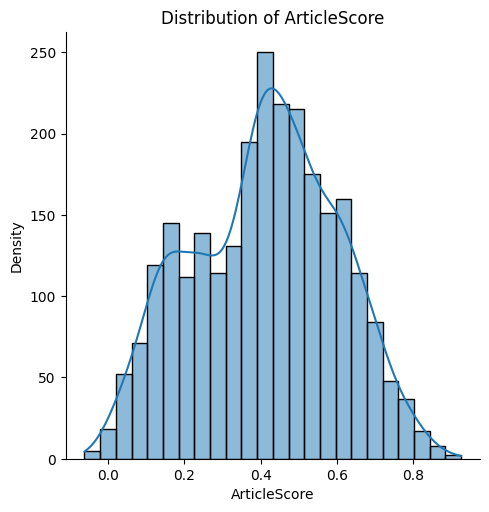

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


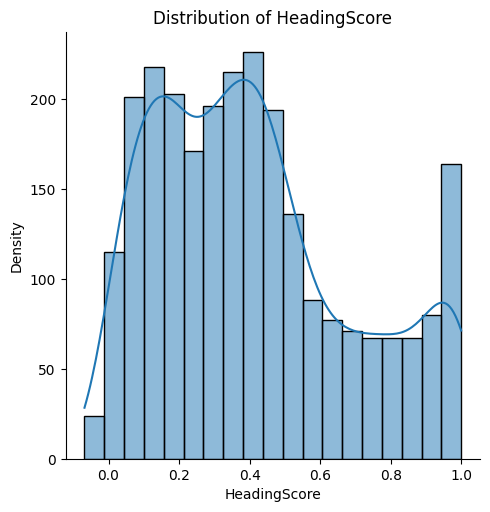

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.displot(df['ArticleScore'], kde=True)
plt.title('Distribution of ArticleScore')
plt.xlabel('ArticleScore')
plt.ylabel('Density')
plt.show()

sns.displot(df['HeadingScore'], kde=True)
plt.title('Distribution of HeadingScore')
plt.xlabel('HeadingScore')
plt.ylabel('Density')
plt.show()


In [20]:
article_score_avg = df['ArticleScore'].mean()
heading_score_avg = df['HeadingScore'].mean()

print(f'Average ArticleScore: {article_score_avg}')
print(f'Average HeadingScore: {heading_score_avg}')

Average ArticleScore: 0.41057176669832146
Average HeadingScore: 0.4092769636530718
